In [30]:
from new_grid import Grid
from graphics import display_grid
from agent import Agent
import matplotlib.pyplot as plt
import json

In [31]:
easy1 = {'train':(1,0),'trainvel':(0,1),'cargo1':(3,2),'num1':1,'target1':(2,2), 'switch':(0,0),'agent':(4,2),'cargo2':(2,4),'num2':2,'target2':(0,3)}

push3 = {"train": (0, 3), "trainvel": (1, 0), "cargo1": (2, 2), "target1": (0, 4), "switch": (2, 4), "agent": (2, 0), "cargo2": (3, 3), "target2": (3, 4),'num1':1, "num2":2}
push12 = {"train": (1, 0), "trainvel": (0, 1), "cargo1": (2, 2), "target1": (3, 1), "switch": (0, 4), "agent": (3, 1), "cargo2": (1, 4), "target2": (0, 3), 'num1':1, 'num2':2}
push14 = {"train": (4, 4), "trainvel": (-1, 0), "cargo1": (1, 3), "target1": (3, 2), "switch": (4, 1), "agent": (0, 2), "cargo2": (0, 4), "target2": (0, 1), 'num1':1, 'num2':2}

swit27 = {"train": (1, 0), "trainvel": (0, 1), "cargo1": (0, 1), "target1": (4, 3), "switch": (3, 3), "agent": (4, 4), "cargo2": (1, 2), "target2": (0, 3), 'num1':1, "num2":2}
swit10 = {"train": (0, 2), "trainvel": (1, 0), "cargo1": (2, 2), "target1": (2, 3), "switch": (4, 0), "agent": (2, 0), "cargo2": (1, 3), "target2": (4, 2), 'num1':1, "num2":2} 

reallyhard45 = {"train": (4, 0), "trainvel": (0, 1), "cargo1": (1, 4), "target1": (2, 3), "switch": (3, 0), "agent": (3, 2), "cargo2": (4, 3), "target2": (3, 3), 'num1':1, "num2":2}


In [60]:
testgrid = Grid(5, random=False, init_pos=reallyhard45)
display_grid(testgrid)

[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' 'S' '^']]
=====


array([['_', '1', '_', '_', '_'],
       ['_', '_', 'a', 'b', '2'],
       ['_', '_', '_', '◉', '_'],
       ['_', '_', '_', '_', '_'],
       ['_', '_', '_', 'S', '^']], dtype='<U1')

In [33]:
agent=Agent()
Q, policy = agent.mc_first_visit_control(testgrid, iters=10000, nn_init=True)
grids,actions,r = agent.run_final_policy(testgrid, Q,nn_init=True,display=True)

neural net loaded
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' 'S' '^']]
=====
(1, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' '◉' '^']
 ['_' '_' '_' 'S' '_']]
=====
(0, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '_' '^']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' 'S' '_']]
=====
(1, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '_' '<' '_']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' 'S' '_']]
=====
(0, 0)
[['_' '1' '_' '_' '_']
 ['_' '_' 'a' 'b' '2']
 ['_' '_' '<' '_' '_']
 ['_' '_' '_' '◉' '_']
 ['_' '_' '_' 'S' '_']]
=====
(0, 0)
0


In [62]:
def run_both(testgrid,iterlist,num):
    dual = [0]*len(iterlist)
    based = [0]*len(iterlist)
    agent = Agent()

    for idx,iters in enumerate(iterlist):
        for i in range(num):
            Q, policy = agent.mc_first_visit_control(testgrid, iters=iters, nn_init=True)
            grids,actions,r = agent.run_final_policy(testgrid.copy(), Q,nn_init=True,display=False)
            dual[idx] += r

            Q, policy = agent.mc_first_visit_control(testgrid, iters=iters, nn_init=False)
            grids,actions,r = agent.run_final_policy(testgrid.copy(), Q,nn_init=False,display=False)
            based[idx] += r


    dual = [x/num for x in dual]
    based = [x/num for x in based]
    return dual,based

dual,based = run_both(testgrid,[0,100,200,300,400,500],1)
print(dual,based)

neural net loaded
[-4.0, 0.0, -2.0, -2.0, -2.0, 0.0] [-2.0, -2.0, 0.0, 0.0, 0.0, -2.0]


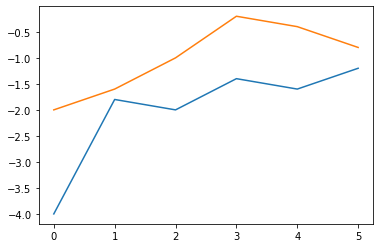

In [58]:
plt.plot(dual, label = "dual")
plt.plot(based, label = "based")

In [147]:
with open('gridworld_experiment/test_data.json') as json_file:
    json_data = json.load(json_file)
   
push_dilemma = []
switch_dilemma = []
push_get = []
switch_save = []

for key,grid in json_data.items():
    for pos in json_data[key]:
        if type(json_data[key][pos])==list: 
            json_data[key][pos] = tuple(json_data[key][pos])
    json_data[key]['num1'] = 1
    json_data[key]['num2'] = 2
    grid = Grid(init_pos=json_data[key])
    print(try_all(grid))
    if 100 <= int(key) <= 108:
        rewards = try_all(grid)
        push_dilemma.append(rewards[-1]/3125*100)
    if 200 <= int(key) <= 208:
        rewards = try_all(grid)
        switch_dilemma.append(rewards[-1]/3125*100)
    if 300 <= int(key) <= 308:
        rewards = try_all(grid)
        switch_save.append(rewards[0]/3125*100)
    if 400 <= int(key) <= 408:
        rewards = try_all(grid)
        push_get.append(rewards[1]/3125*100)

    #print(run_both(grid,[0,20,30,50,100],10))
       

defaultdict(<class 'int'>, {0: 2204, -4: 920, 1: 1})
defaultdict(<class 'int'>, {-4: 740, 0: 260, -2: 2125})
defaultdict(<class 'int'>, {0: 2418, -4: 590, -2: 65, 2: 41, 1: 11})
defaultdict(<class 'int'>, {0: 3067, -4: 40, 2: 18})
defaultdict(<class 'int'>, {-1: 3125})
defaultdict(<class 'int'>, {0: 2883, -4: 230, 2: 12})
defaultdict(<class 'int'>, {-2: 1500, -4: 970, 0: 655})
defaultdict(<class 'int'>, {-2: 2432, -1: 63, 0: 619, 1: 11})
defaultdict(<class 'int'>, {-1: 2375, -4: 440, 0: 178, 1: 132})
defaultdict(<class 'int'>, {-2: 140, 0: 2972, 2: 13})
defaultdict(<class 'int'>, {-1: 3125})
defaultdict(<class 'int'>, {-3: 690, 1: 179, 0: 6, -1: 2250})
defaultdict(<class 'int'>, {-2: 2504, 0: 621})
defaultdict(<class 'int'>, {-2: 2500, -4: 565, 0: 60})
defaultdict(<class 'int'>, {-1: 2825, -4: 265, 0: 35})
defaultdict(<class 'int'>, {-4: 60, 0: 2896, -1: 91, -2: 3, 2: 75})
defaultdict(<class 'int'>, {0: 3112, 2: 13})
defaultdict(<class 'int'>, {-2: 2630, -1: 96, 0: 281, -4: 118})
defau

push_dilemma [4.0, 4.0, 1.6, 20.0, 5.152, 4.0, 4.0, 4.0]
switch_dilemma [2.4, 4.0, 8.0, 0.96, 2.4, 0.8, 8.0, 0.64]
switch_save [14.399999999999999, 20.0, 4.96, 4.0, 19.872, 20.0, 28.000000000000004, 19.872]
push_get [0.032, 2.432, 11.744, 11.360000000000001, 0.064, 1.024, 2.2079999999999997, 35.168]


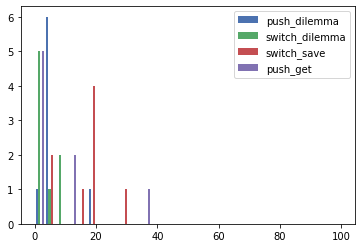

MEANS
push_dilemma 5.844
switch_dilemma 3.4000000000000004
switch_save 16.387999999999998
push_get 8.004


In [146]:
print("push_dilemma",push_dilemma)
print("switch_dilemma", switch_dilemma)
print("switch_save", switch_save)
print("push_get",push_get)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 2000)
bins = np.linspace(0, 100, 30)

plt.hist([push_dilemma, switch_dilemma,switch_save,push_get], bins, label=['push_dilemma', 'switch_dilemma',"switch_save","push_get"])
plt.legend(loc='upper right')
plt.show()

print("MEANS")
print("push_dilemma",np.mean(push_dilemma))
print("switch_dilemma",np.mean(switch_dilemma))
print("switch_save",np.mean(switch_save))
print("push_get",np.mean(push_get))

In [77]:
from collections import defaultdict

actions = [(-1,0),(0,-1),(1,0),(0,1),(0,0)]
all_possible = []
for i in range(5):
    for j in range(5):
        for k in range(5):
            for l in range(5):
                for m in range(5):
                    all_possible.append([actions[i],actions[j],actions[k],actions[l],actions[m]])

def try_all(grid):
    reward_dict = defaultdict(int)
    for policy in all_possible:
        g = grid.copy()
        r = 0
        for action in policy:
            r += g.R(action)
            g.T(action)
        reward_dict[r] += 1
    return reward_dict
